## LEAD SCORING CASE STUDY

-- Lead conversion rate is 30 %
-- Identifiy most potential Leads i.e people who are more chances to enroll "HOT LEADS"
-- This will increase the conversioon rate as call will be made to only those HOT LEADS instead of calling everybody.
-- Assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance
and the customers with lower lead score have a lower conversion chance.
-- Lead conversion target should be around 80 %

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

Imported Necessary Libraries

 Loading and Reading the data

In [2]:
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# to see the Numeric values in the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking for duplicate values in the Data Frame/ Data Set.
leads.duplicated().sum()

0

As per understanding columns ProspectID and Lead number denotes the same thing i.e define a unique ID for all the customers that were contacted.
Being an ID column both can be dropped as it will not provide much insight going forward.

### 1. Data cleaning and Preparation

In [7]:
# Replacing the Select values with nan as it is not an valid value.
leads=leads.replace('Select',np.nan)

In [8]:
# Dropping the ID columns i.e ProspectID and Lead Number.
leads.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [9]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Checking percentage of NULL values.
def perc_null(x):
    return round(100*(x.isnull().sum()/len(x.index)), 2)
    

(perc_null(leads))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Dropping columns with more than 40% NULL values.

drop_cols=leads.columns

for i in drop_cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, axis=1, inplace = True)

In [12]:
# again checking the percentage of NULLS

perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Here we can see still there are some columns that have high % of missing values, but again we cannot conclude and remove all those also, because we may loose a lot of data and it will affect our resulting model.
If the need arises we will drop these columns in future steps.

In [13]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Here clearly India is the most common value present. We create categories by which we can impute the null values too.

In [15]:
leads['Country'] = leads['Country'].fillna('Not Mentioned')

In [16]:
def categories(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Mentioned":
        category = "Not Mentioned"
    else:
        category = "Outside India"
    return category

leads['Country'] = leads.apply(lambda x:categories(x['Country']), axis = 1)
leads['Country'].value_counts()

India            6492
Not Mentioned    2461
Outside India     287
Name: Country, dtype: int64

In [17]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

  ***************************************

In [18]:
leads['Specialization'].value_counts(dropna=False) # For this we cannot clearly say which is the most highest occuring value.

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# We impute the missing values/Null values with 'Not Mentioned'

leads['Specialization'] = leads['Specialization'].fillna('Not Mentioned') 

In [20]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [21]:
leads['What is your current occupation'].value_counts(dropna=False) # Here "Unemployed" is clearly the most common value

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# imputing the missing values with "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [23]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [24]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False) 
#Clearly there is one value most common among all.

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# imputing the nulls with "Better Career Prospects"
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [26]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [27]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

    *******************************************************************************************************************

In [29]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# Replacing NaN values with "Mumbai"
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

**************

Finally checking again for Null values.

In [31]:
perc_null(leads)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [32]:
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: i

In [33]:
 #📌 DROPPING THE REMAINING NULL VALUES as the percentage is less that 2 % so it will not affect our data adversly.

leads_final=leads.dropna()

In [34]:
perc_null(leads_final)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [35]:
leads_final.shape

(9074, 28)

    *******************************************************************************************************************

### 2. EDA

#### 2.1 Univariate Analysis

###### 2.1.1 Categorical columns

In [36]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

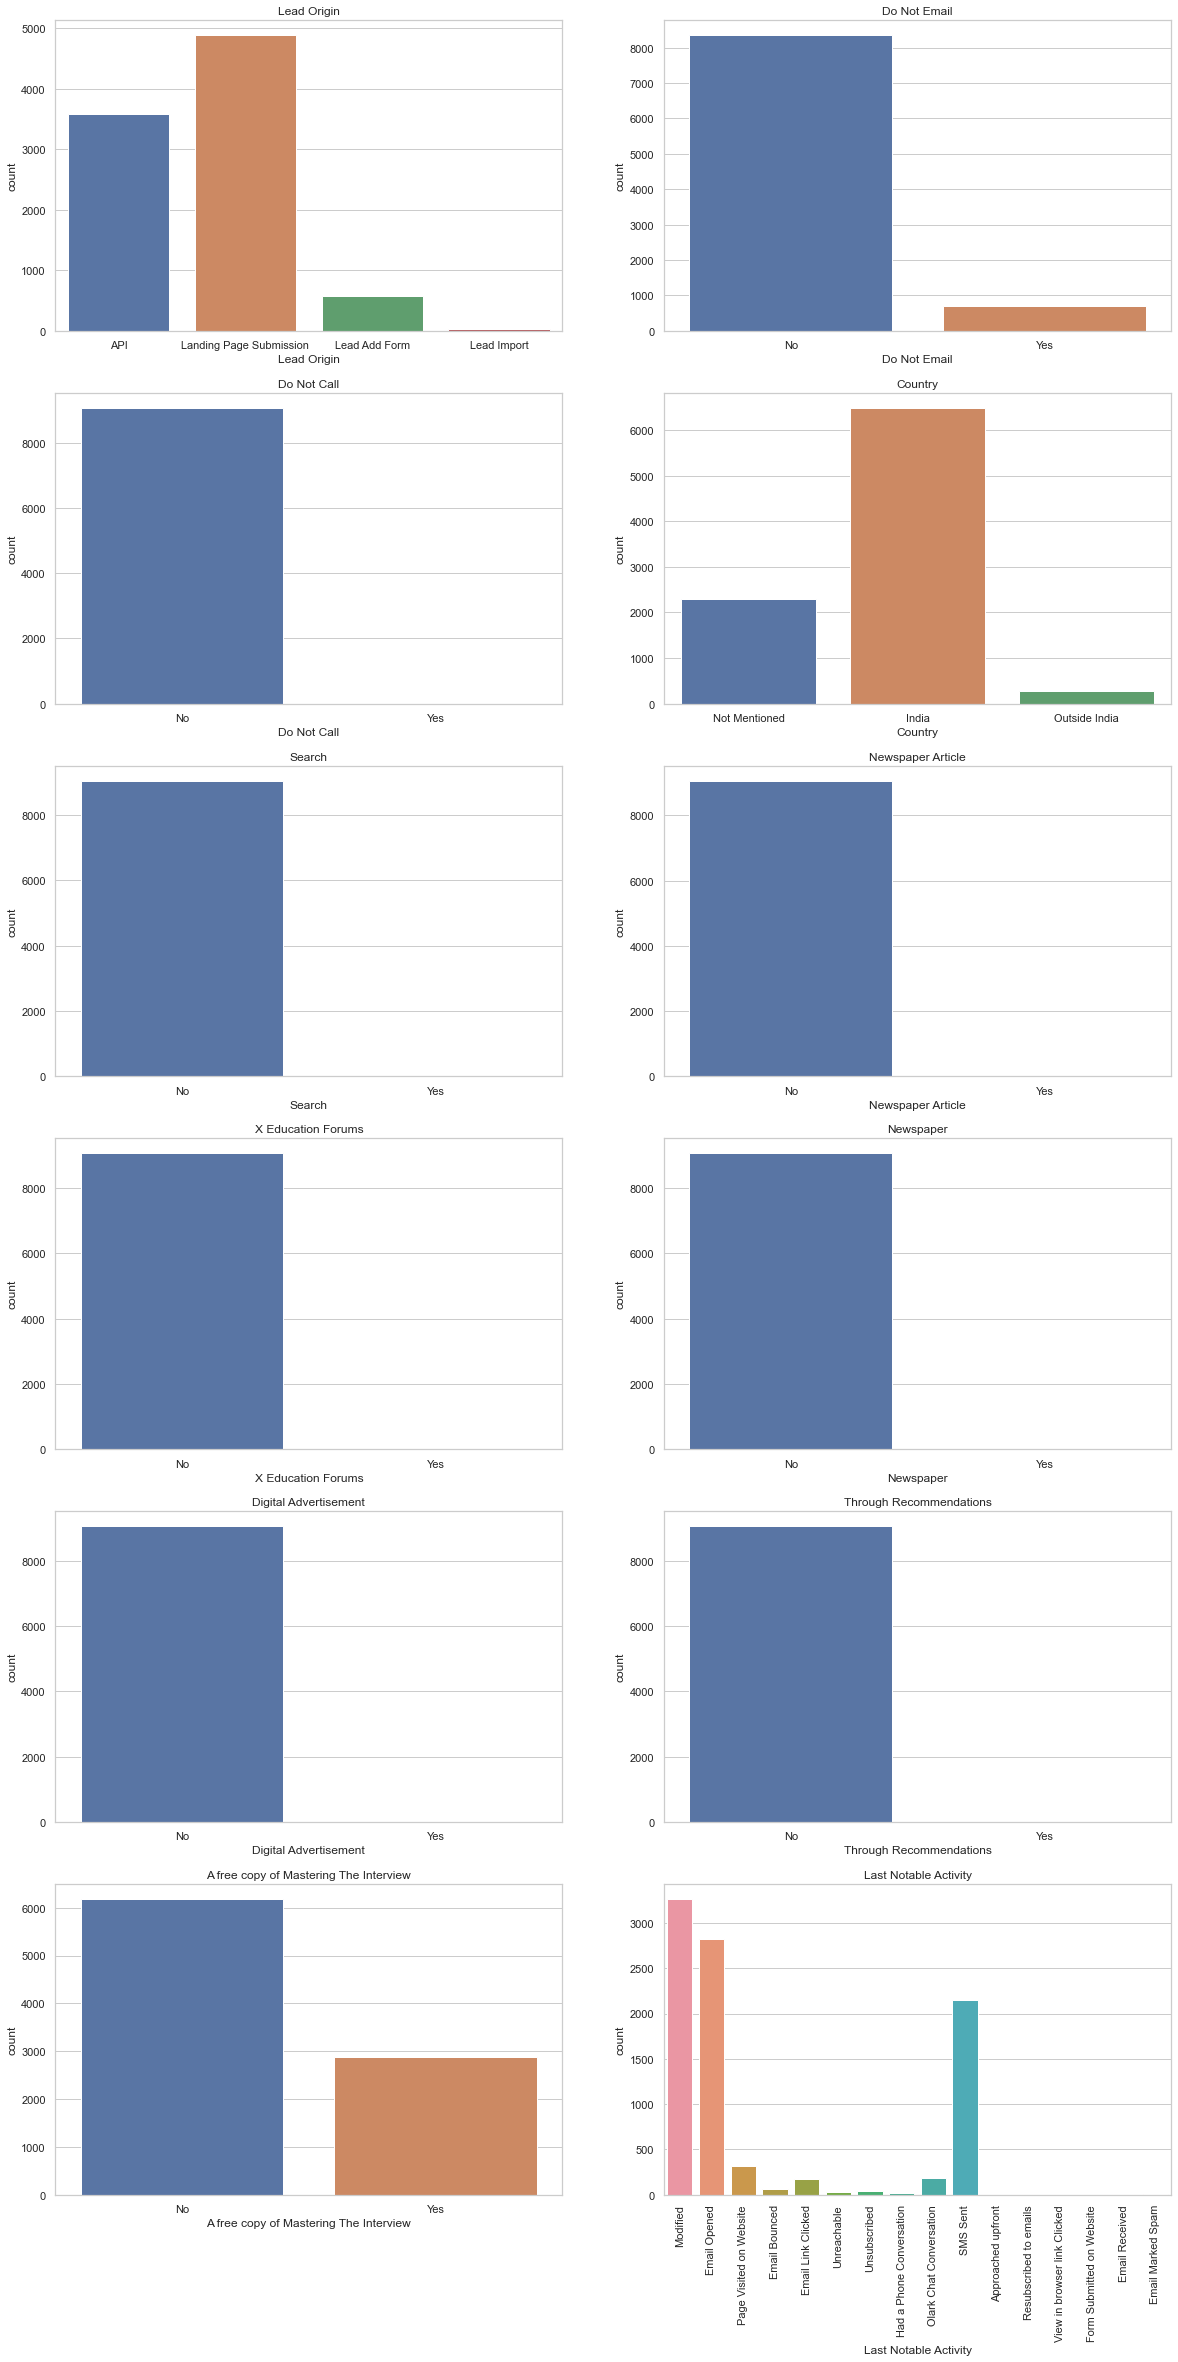

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

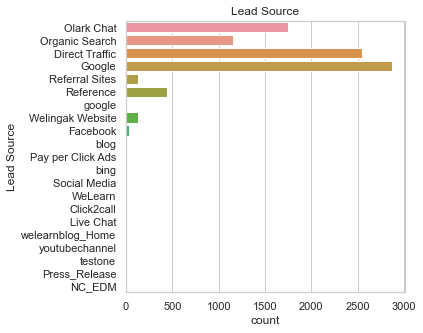

In [38]:
plt.figure(figsize = (5,5))
sns.countplot(data=leads_final,y='Lead Source').tick_params(axis='y')
plt.title('Lead Source')
plt.show()

###### 📌 The graph above shows that major source of getting the leads is GOOGLE. 

Also based on the above plot we can club the lower frequency values into a single category to ease our process.

In [39]:

# Checking the values_counts
leads_final['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [40]:

# combining low frequency values and also replacing left over nan values if any.
leads_final['Lead Source'] = leads_final['Lead Source'].replace(np.nan,'Others')
leads_final['Lead Source'] = leads_final['Lead Source'].replace('google','Google')
leads_final['Lead Source'] = leads_final['Lead Source'].replace('Facebook','Social Media')
leads_final['Lead Source'] = leads_final['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')  

*************************************************************************************************

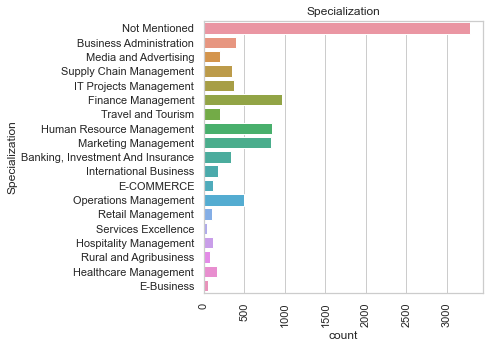

In [41]:
plt.figure(figsize = (5,5))
sns.countplot(data=leads_final,y='Specialization',orient="h").tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

###### 📌 From the above we see that a Majority of the customers choose not to specify thier domain in which they are working. And a large number of customer are from Finance Management. Overall Management segment has majority of customers.

Again we can see as there are multiple segments for MANAGEMENT we can again club them together for a better insight.

In [42]:
leads_final['Specialization'].value_counts()

Not Mentioned                        3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [43]:
leads_final['Specialization'] = leads_final['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                                     'Operations Management','IT Projects Management',
                                                     'Supply Chain Management','Healthcare Management','Hospitality Management',
                                                    'Retail Management'] ,'Management') 

Combinig multiple values will help later in our DUMMY creation STEP.
***********************************************************************************

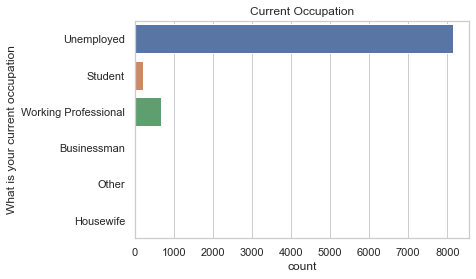

In [44]:
sns.countplot(data=leads_final,y='What is your current occupation').tick_params(axis='x')
plt.title('Current Occupation')
plt.show()

###### 📌 From aboe it is seen that most of the customers are UNEMPLOYED.

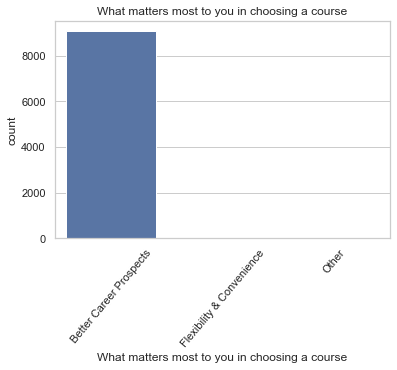

In [45]:
sns.countplot(data=leads_final,x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 50)
plt.title('What matters most to you in choosing a course')
plt.show()

📌 Here from the above plot we see a clear majority of people doing the Course with the motto of BETTER CAREER PROSPECTS. However this is also an unbalanced variable.

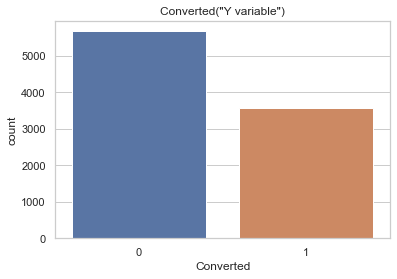

In [46]:
sns.countplot(leads['Converted'])
plt.title('Converted("Y variable")')
plt.show()

📌 From the above we see that untill now most majority of the leads that the company got were not Converted i.e did not buy/enroll into any of the courses.

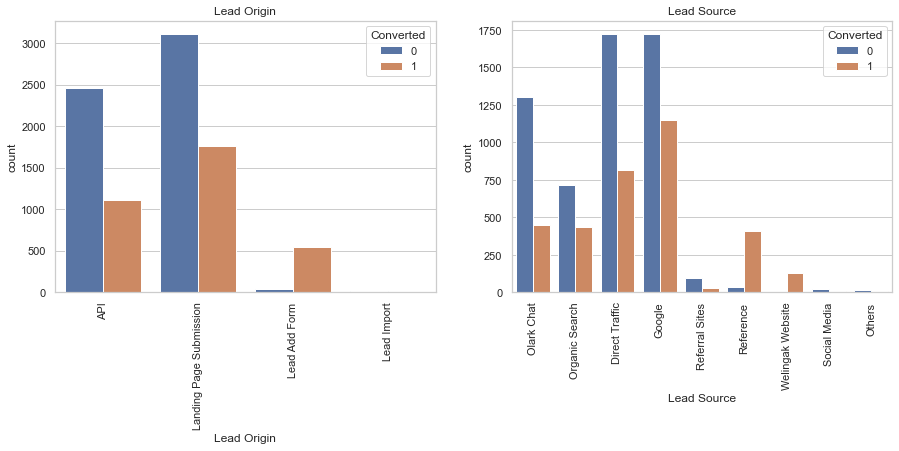

In [47]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

1. Majority of the Leads were Identified at the "Landing Page Submission"
2. "Olark Chat", "Direct Trafic" and "Google" were major Lead sources and amongst them Google saw highe lead conversion.

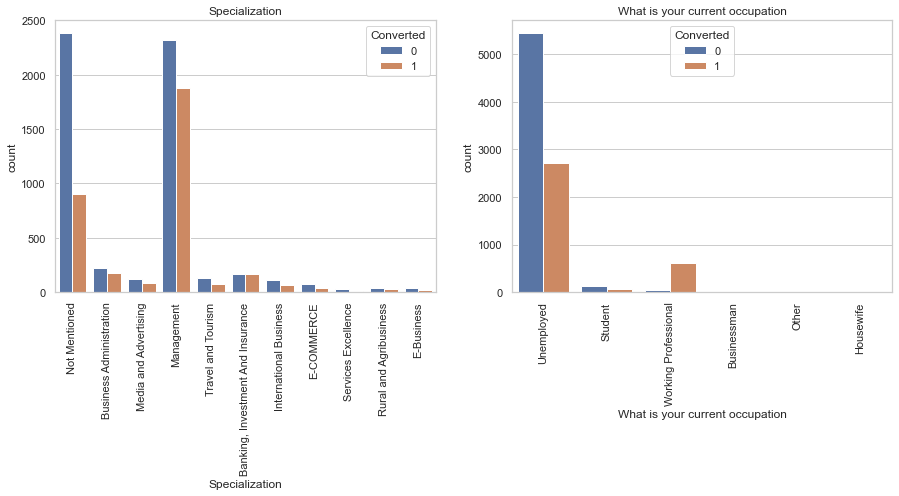

In [48]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

📌 Majority of the Leads have choosen Not to mention their workig Domain and also majority of the customers are Unemployed.

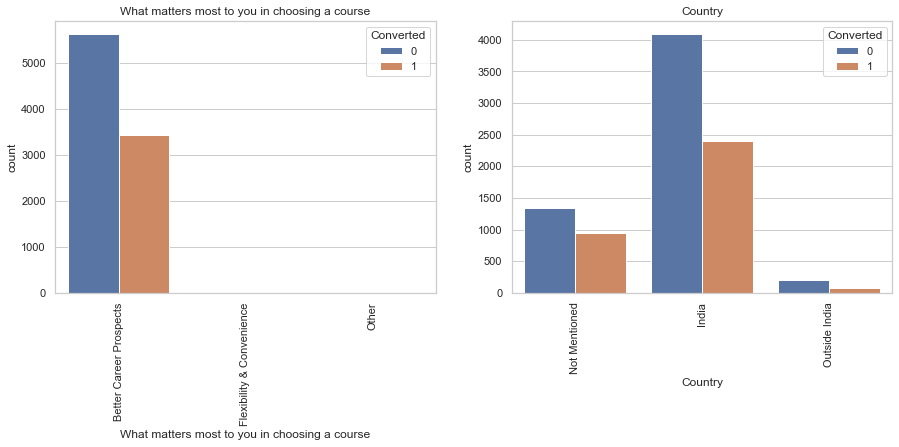

In [49]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

This plot shows a particular reson majorily why people are choosing a course.
Also most of the leads are from INDIA. Also here again we can see an imbalance in data.

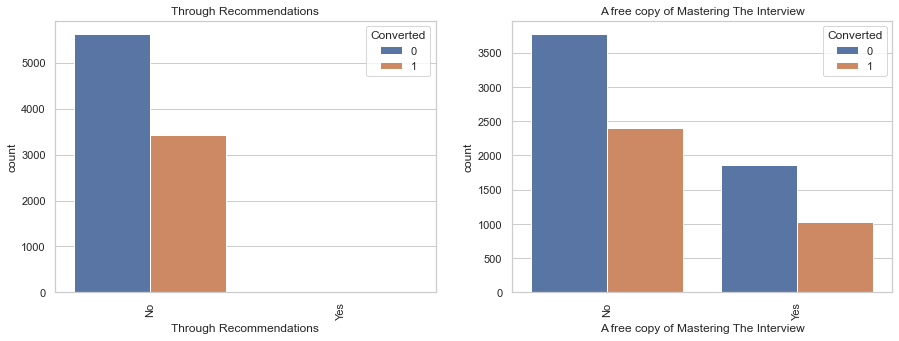

In [50]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

This plot does not gives much inference apart from a fact that "Through Recommendation" is also imbalanced.

In [51]:
leads_final.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [52]:
# Now we check if there are columns with Unique values.
leads_final.nunique()

Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     11
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

*******************************************************************              

In [53]:
# Based on our visualisation above we will now delete the unwanted columns/ Unbalanced Columns/ columns with least unique values.

Cols_to_del=['Country','What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
  'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [54]:
leads_final=leads_final.drop(Cols_to_del,1)
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

2.1.2 Numerical Colums

In [55]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

<AxesSubplot:>

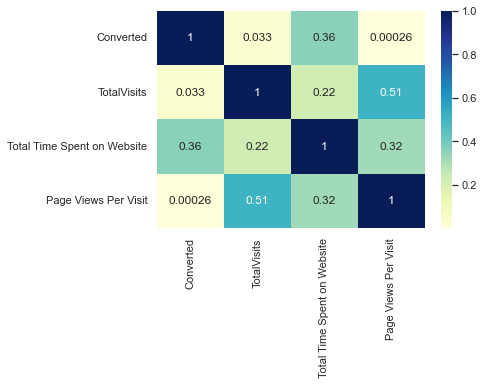

In [56]:
# By looking at the remaining columns and the given data set, we saw there are three numeric variables to consider apart from our target variable "Converted"

# I used Heat Map to get an insight on the correlation among the numeric variables.
def Lead_heatmap(x):
    return sns.heatmap(x.corr(), cmap='YlGnBu', annot=True) 

Lead_heatmap(leads_final)   

📌 By looking at the heatmap we say that "Total Visits" is the highly co-related variable.

CHECKING FOR OUTLIERS AND Outlier Treatment.

In [57]:
outlier = leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outlier.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000


📌 from the above it does not seems like we have any major/ possible outliers. We will look at each of the 3 variables individually next.m

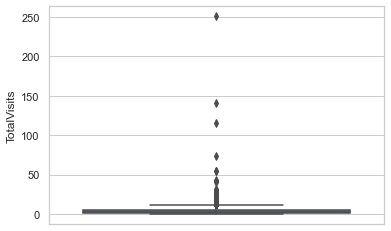

In [58]:
# For variable "Total Visits".

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

📌 It is evident that there are some outliers present in 'Total Visits'

In [59]:
leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

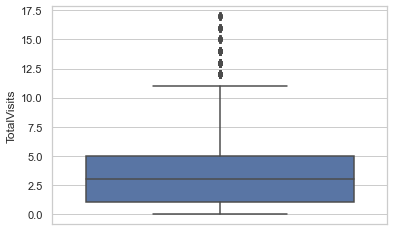

In [60]:
# Removing the Top 1% and bottom 1% values.

Q3 = leads_final.TotalVisits.quantile(0.99)
leads_final = leads_final[(leads_final.TotalVisits <= Q3)]

Q1 = leads_final.TotalVisits.quantile(0.01)
leads_final = leads_final[(leads_final.TotalVisits >= Q1)]

sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

In [61]:
leads_final.shape

(8991, 14)

Now it can be said that there are not such possible outliers present in "TotalVisits"

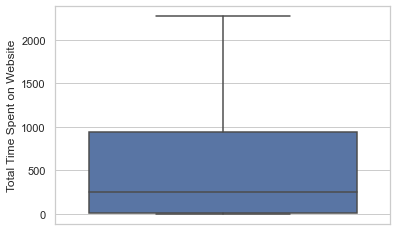

In [62]:
# Checking "Total Time Spent on Website"

sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()


As it is visible in above plot, there are no such possible outliers

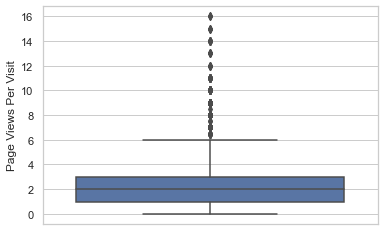

In [63]:
# Checking "Page Views Per Visit"

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()


In [64]:
leads_final['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

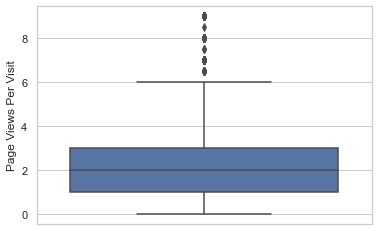

In [65]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_final['Page Views Per Visit'].quantile(0.99)
leads_final = leads_final[leads_final['Page Views Per Visit'] <= Q3]

Q1 = leads_final['Page Views Per Visit'].quantile(0.01)
leads_final = leads_final[leads_final['Page Views Per Visit'] >= Q1]

sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()

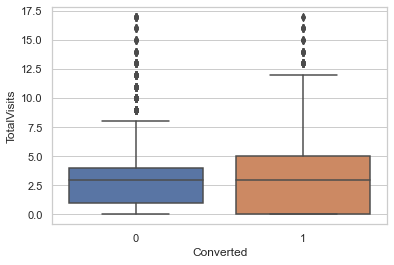

In [66]:
# Conparing "Total Visits" vs "Converted"

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_final)
plt.show()

1. Cannot say any concrete statement based on Total Visits.
2. Median is very close for converted and Non-Converted customers.

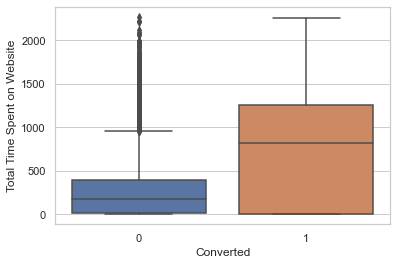

In [67]:
# Comparing "Total Time Spent on Website" vs "Converted" (target Variable)

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads_final)
plt.show()

1. Customers who spend more time on website are more likely to convert.

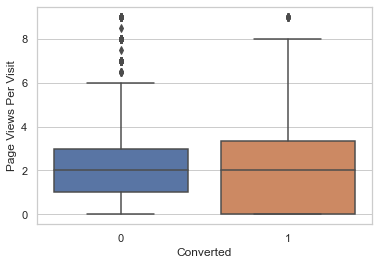

In [68]:
# "Page Views Per Visit" vs "Converted"

sns.boxplot(x='Converted',y='Page Views Per Visit', data=leads_final)
plt.show()


1. Nothing much can be infered based on this plot.
2. Median is exactly same for both types of conversions.

In [69]:
# Once again checking for percentage NULL values to rule out any mistakes.
perc_null(leads_final)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

<AxesSubplot:>

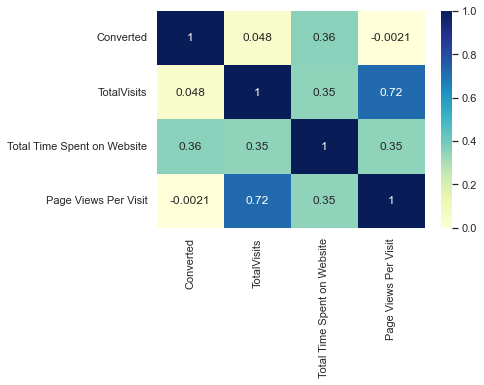

In [70]:
# Checking the Correaltion again.

Lead_heatmap(leads_final)

*****************************************************************************************

## 3. DUMMY VALUES CREATION AND SUBSTITUTION.

In [71]:
cat_cols= leads_final.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [72]:
leads_final.loc[:, leads_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [75]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final_dummy = pd.concat([leads_final, dummy], axis=1)
leads_final_dummy

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Mentioned,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Mentioned,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Mentioned,Unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management,Unemployed,...,0,0,0,0,0,0,1,0,0,0


In [77]:
# Combine the vlaues for "TAG", "Last Activity" and "Last Noted Activity" and then proceed with TRAIN TEST SPLIT.

Not Specified                                        3278
Will revert after reading the email                  1983
Ringing                                              1160
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          168
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with 

In [74]:
leads_final.shape

(8924, 14)